In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tk

#câu 1:
#a
df = pd.read_csv("Data4.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fname      249 non-null    object 
 1   lname      249 non-null    object 
 2   gender     249 non-null    object 
 3   age        249 non-null    int64  
 4   exercise   249 non-null    int64  
 5   hours      249 non-null    int64  
 6   grade      249 non-null    float64
 7   address    249 non-null    object 
 8   pretest1   249 non-null    int64  
 9   posttest1  249 non-null    int64  
 10  pretest2   249 non-null    int64  
 11  postest2   249 non-null    int64  
 12  pretest3   249 non-null    int64  
 13  postest3   249 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 27.4+ KB


In [8]:
#b
shape = df.shape
print(shape)

(249, 14)


In [9]:
#c
columns = df.columns.tolist()
value_counts = df.count()
print(columns)

print(value_counts)


['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade', 'address', 'pretest1', 'posttest1', 'pretest2', 'postest2', 'pretest3', 'postest3']
fname        249
lname        249
gender       249
age          249
exercise     249
hours        249
grade        249
address      249
pretest1     249
posttest1    249
pretest2     249
postest2     249
pretest3     249
postest3     249
dtype: int64


In [10]:
#d
print(df.head(20))

      fname      lname  gender  age  exercise  hours  grade  \
0    Marcia       Pugh  female   17         3     10   82.4   
1    Kadeem   Morrison    male   18         4      4   78.2   
2      Nash     Powell    male   18         5      9   79.3   
3   Noelani     Wagner  female   14         2      7   83.2   
4   Noelani     Cherry  female   18         4     15   87.4   
5      Neil    Whitley    male   16         5     16   88.7   
6     Nelle     Golden  female   17         1      9   80.2   
7   Armando    Hoffman    male   17         5     18   95.1   
8   Illiana      Rojas  female   15         5      9   76.5   
9      Neil     Wooten    male   15         3     15   89.7   
10   Daquan    Alvarez    male   16         2     13   85.2   
11     Nola  Velazquez  female   15         2     10   75.3   
12    Quinn     Warren  female   14         4     12   80.7   
13  Frances  Velasquez  female   15         2     15   84.2   
14  Lareina      Poole  female   18         1     14   

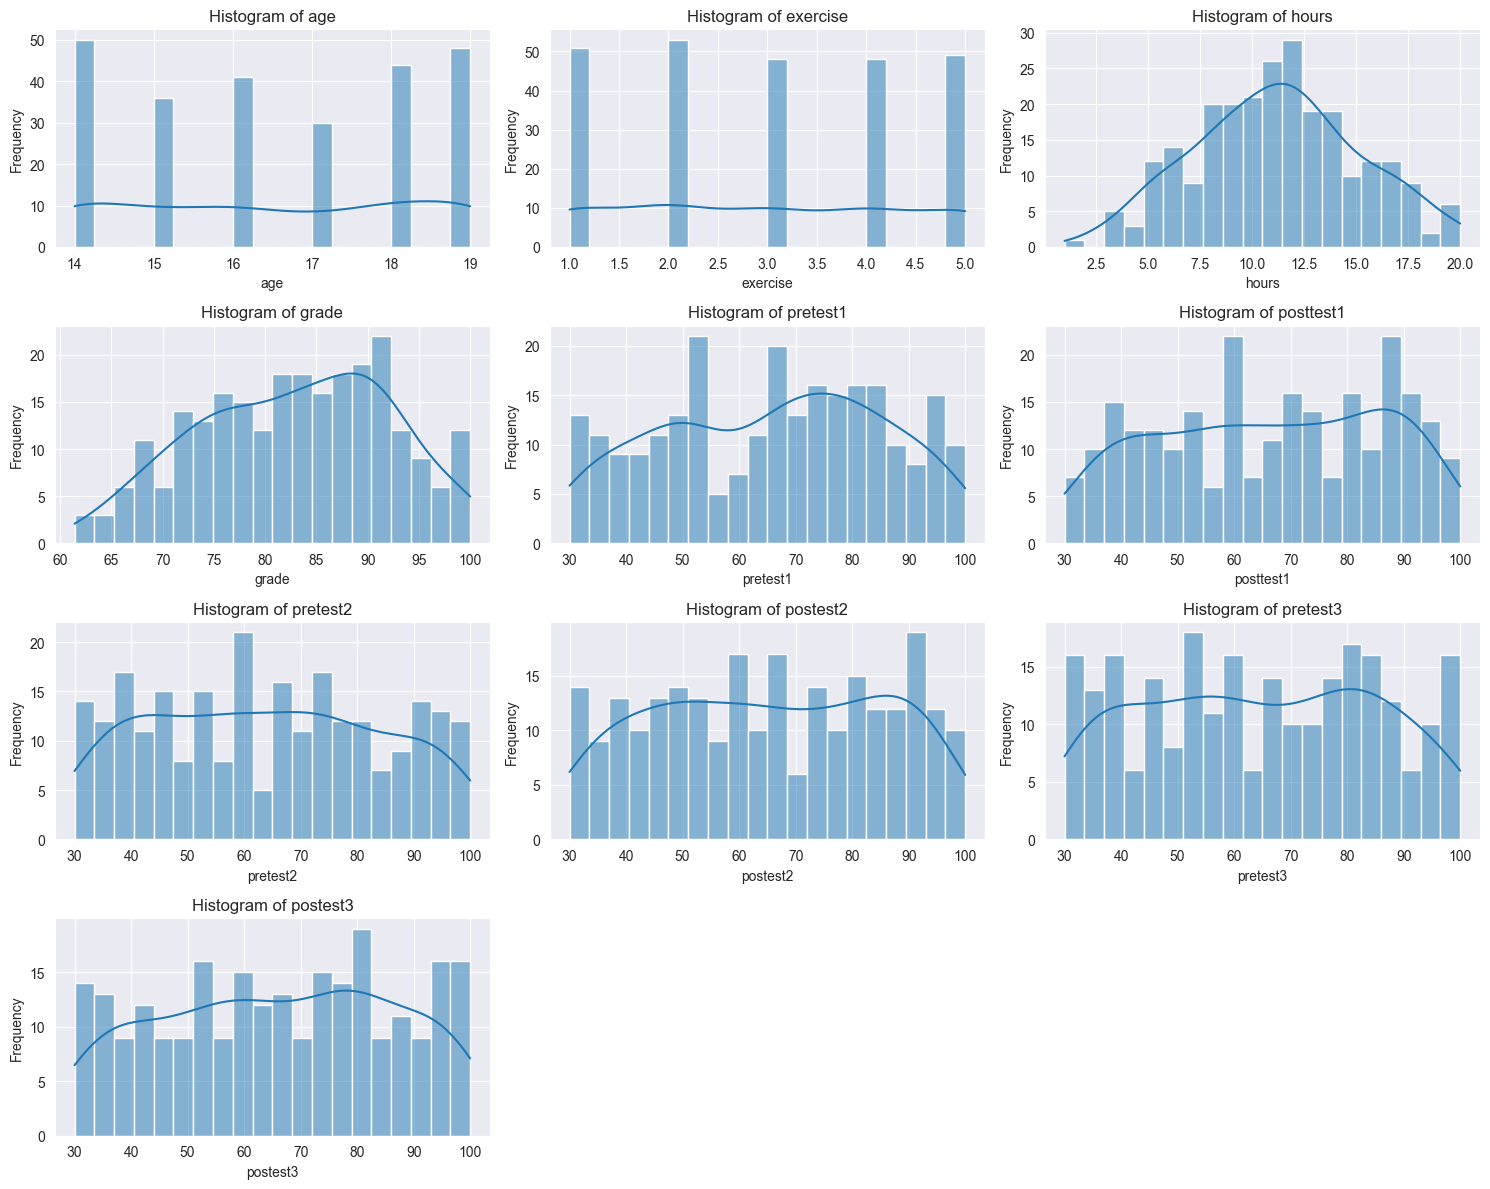

In [11]:
#e
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc các cột dạng số
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 12))

# Vẽ histogram cho mỗi cột dạng số
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:
#câu 2
#a
groupby_gender = df.groupby("gender").size()
groupby_age = df.groupby("age").size()
groupby_gender_age = df.groupby(["gender", "age"]).size()

In [13]:
#b
df["gender_num"] = df["gender"].apply(lambda x: 1 if x == "male" else 0)

In [14]:
#c
df["pretest"] = df[["pretest1", "pretest2", "pretest3"]].mean(axis=1)

In [15]:
#d
df["gender_num_apply"] = df["gender"].apply(lambda x: 1 if x == "male" else 0)
df["pretest_apply"] = df.apply(lambda row: (row["pretest1"] + row["pretest2"] + row["pretest3"]) / 3, axis=1)

In [16]:
df[["gender", "gender_num", "gender_num_apply", "pretest", "pretest_apply"]].head()

,gender,gender_num,gender_num_apply,pretest,pretest_apply
0,female,0,0,50.000000,50.000000
1,male,1,1,62.333333,62.333333
2,male,1,1,61.666667,61.666667
3,female,0,0,77.666667,77.666667
4,female,0,0,56.000000,56.000000


In [17]:
#câu 3
#a
pretest_mean = df["pretest"].mean()
pretest_median = df["pretest"].median()
pretest_mode = df["pretest"].mode()

In [18]:
#b
bins = df["pretest"].quantile([0, 0.25, 0.5, 0.75, 1.0]).values
labels = ["Low", "Medium", "Good", "Excellent"]
df["pretest_group"] = pd.cut(df["pretest"], bins=bins, labels=labels, include_lowest=True)

In [23]:
#c
correlation_matrix = df.corr(numeric_only=True)
pretest_correlations = correlation_matrix["pretest"].drop("pretest")
print("\nHệ số tương quan giữa pretest và các cột khác:")
print(pretest_correlations)


Hệ số tương quan giữa pretest và các cột khác:
age                 0.047209
exercise            0.022246
hours               0.056226
grade               0.080949
pretest1            0.624940
posttest1          -0.041510
pretest2            0.541592
postest2            0.016221
pretest3            0.572228
postest3            0.042297
gender_num          0.049668
gender_num_apply    0.049668
pretest_apply       1.000000
Name: pretest, dtype: float64


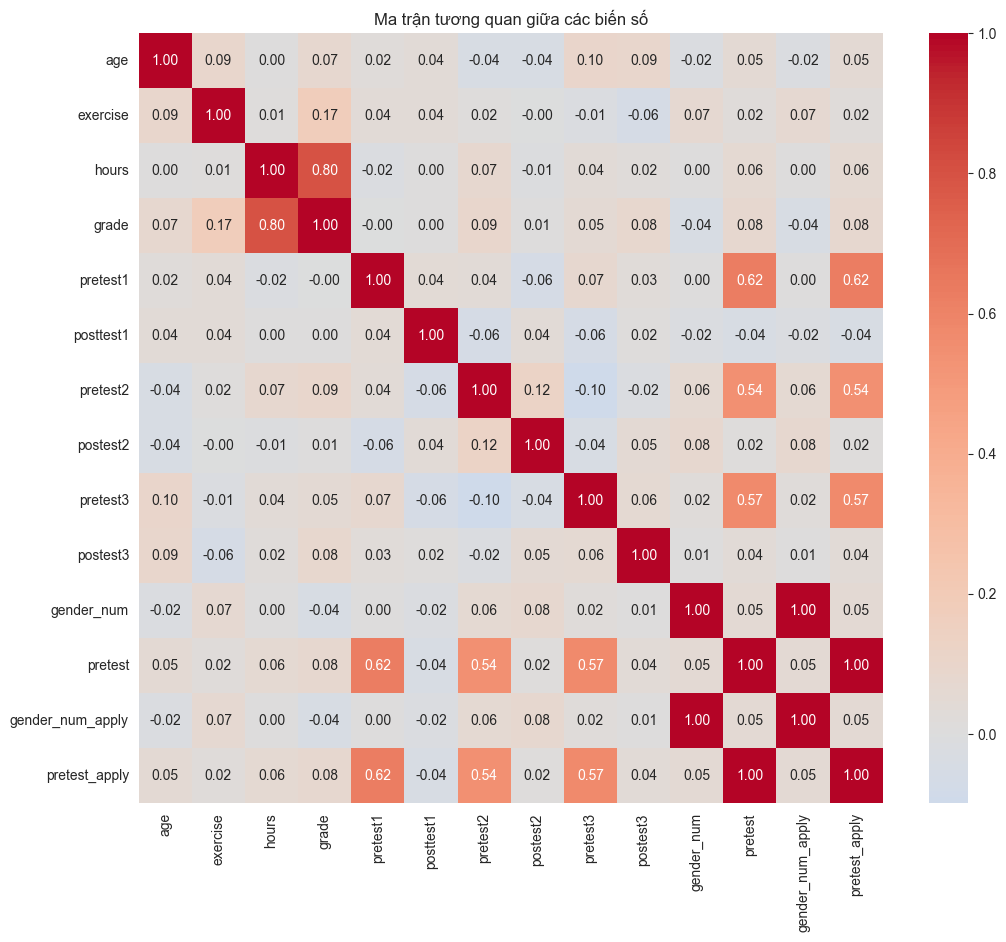

In [22]:
#d
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các biến số')
plt.show()


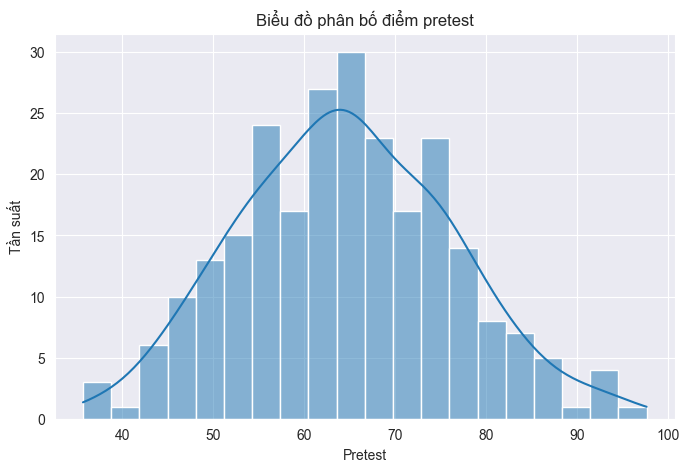

In [25]:
#câu 4
#a
plt.figure(figsize=(8, 5))
sns.histplot(df["pretest"], kde=True, bins=20)
plt.title("Biểu đồ phân bố điểm pretest")
plt.xlabel("Pretest")
plt.ylabel("Tần suất")
plt.show()

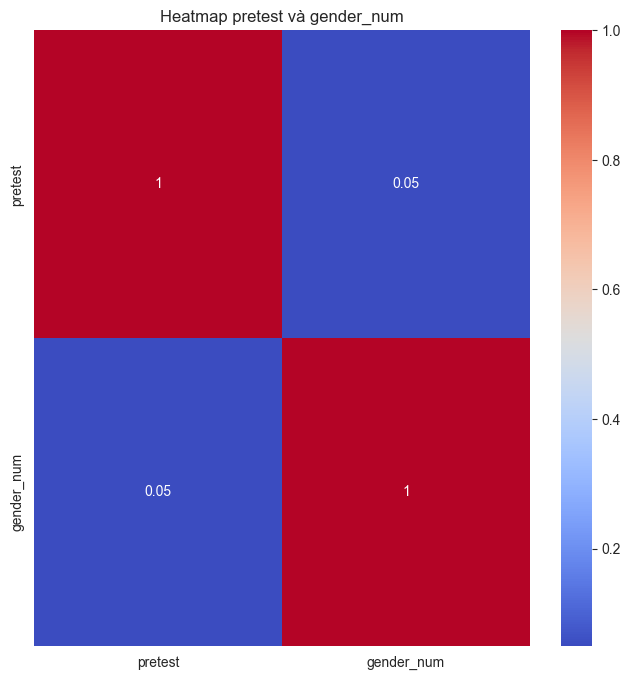

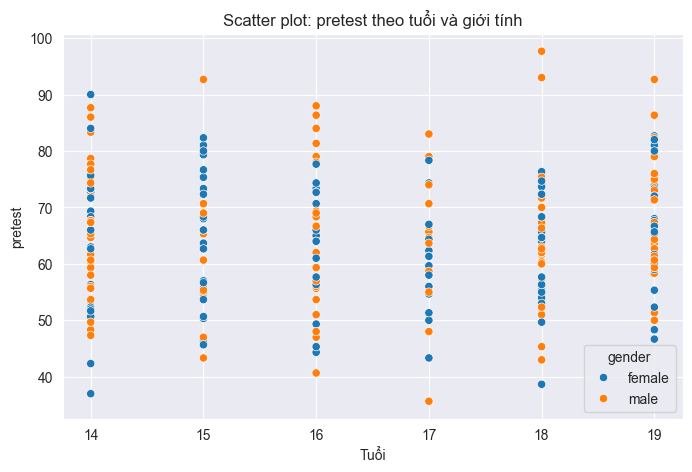

In [29]:
# b
# Heatmap pretest và gender_num
plt.figure(figsize=(8,8))
sns.heatmap(df[['pretest', 'gender_num']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap pretest và gender_num')
plt.show()

# Scatter plot pretest với một biến age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='pretest', data=df, hue='gender')
plt.title('Scatter plot: pretest theo tuổi và giới tính')
plt.xlabel('Tuổi')
plt.ylabel('pretest')
plt.show()

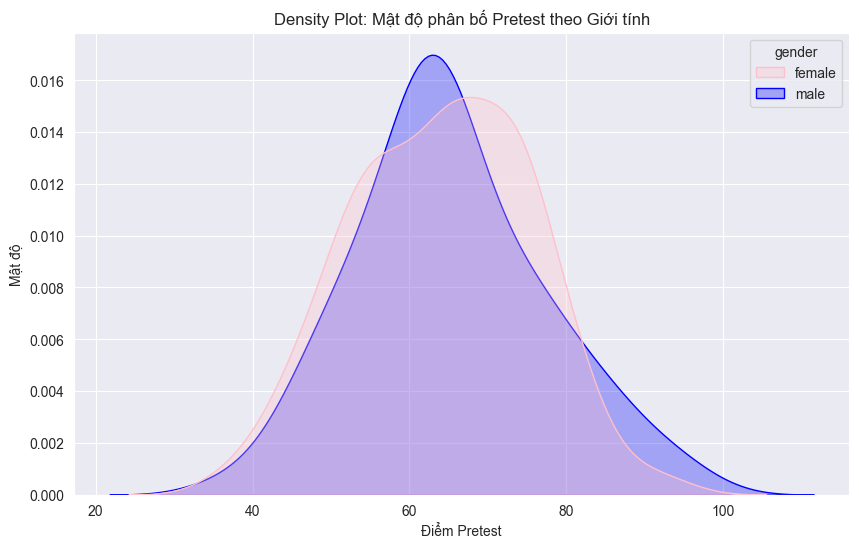

In [41]:
#c
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='pretest', hue='gender',
            palette=['pink', 'blue'], fill=True, alpha=0.3)
plt.title('Density Plot: Mật độ phân bố Pretest theo Giới tính')
plt.xlabel('Điểm Pretest')
plt.ylabel('Mật độ')
plt.grid(True)
plt.show()

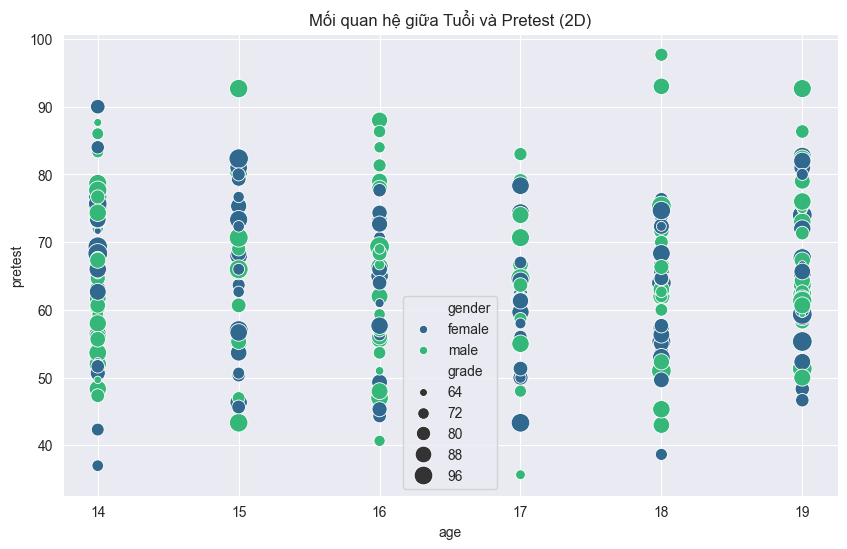

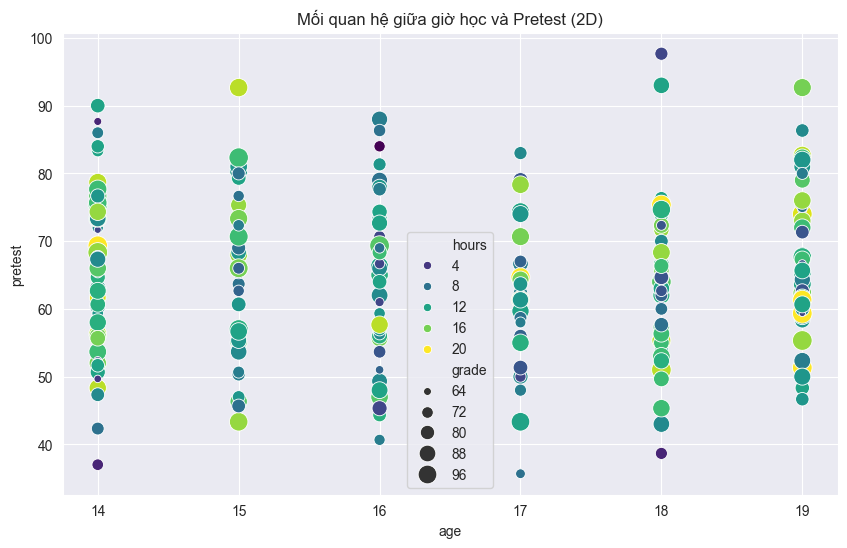

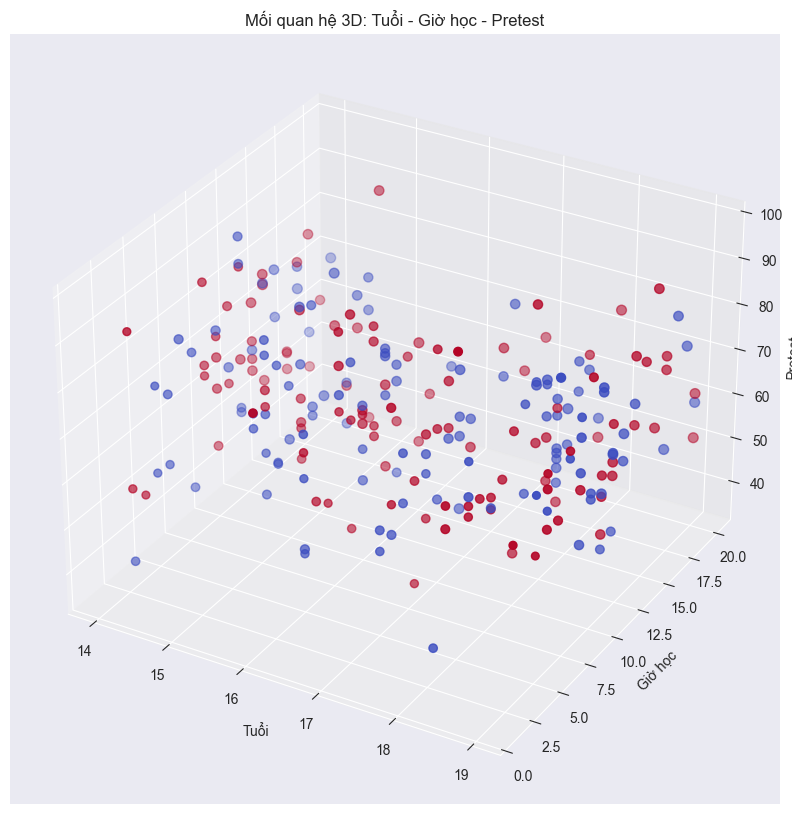

In [48]:
#d
# Biểu đồ 2D giữa tuổi và pretest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='pretest', data=df, hue='gender',
                palette='viridis', size='grade', sizes=(20, 200))
plt.title('Mối quan hệ giữa Tuổi và Pretest (2D)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='pretest', data=df, hue='hours',
                palette='viridis', size='grade', sizes=(20, 200))
plt.title('Mối quan hệ giữa giờ học và Pretest (2D)')
plt.show()

# Biểu đồ 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

x = df['age']
y = df['hours']
z = df['pretest']

ax.scatter(x, y, z, c=df['gender_num'], cmap='coolwarm', s=df['grade']/2)
ax.set_xlabel('Tuổi')
ax.set_ylabel('Giờ học')
ax.set_zlabel('Pretest')
ax.set_title('Mối quan hệ 3D: Tuổi - Giờ học - Pretest')
plt.show()

In [64]:
# Tính toán hệ số tương quan
corr = df[['pretest', 'age', 'exercise', 'hours', 'grade', 'gender_num']].corr()

# Hiển thị các yếu tố ảnh hưởng nhiều nhất
print("Các yếu tố ảnh hưởng đến pretest (theo hệ số tương quan):")
print(corr['pretest'].sort_values(ascending=False)[1:])


Các yếu tố ảnh hưởng đến pretest (theo hệ số tương quan):
grade         0.080949
hours         0.056226
gender_num    0.049668
age           0.047209
exercise      0.022246
Name: pretest, dtype: float64


In [50]:
#câu 5
#a
from sklearn.model_selection import train_test_split

# Chọn đặc trưng đầu vào
features = df[["age", "gender_num", "hours", "exercise", "grade"]]
target = df["pretest"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [51]:
#b xây dựng mô hình Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [52]:
#c
result_df = X_test.copy()
result_df["Thực tế"] = y_test.values
result_df["Dự đoán"] = y_pred
print(result_df.head(10))


     age  gender_num  hours  exercise  grade    Thực tế    Dự đoán
137   14           0     14         1   95.0  75.666667  63.469977
6     17           0      9         1   80.2  62.333333  62.314146
97    15           0     17         3   92.0  68.000000  64.357641
60    16           1     10         3   71.3  64.000000  64.618314
112   19           1     16         5   95.5  62.333333  65.674162
180   18           0      6         5   81.0  64.666667  63.277318
196   19           0     12         4   88.0  65.666667  63.465570
183   19           0     10         2   80.2  60.000000  62.459770
9     15           1     15         3   89.7  55.000000  65.461614
104   18           0     12         3   77.3  76.333333  63.202407


In [58]:
#d
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 143.84
R^2 Score: -0.07


In [55]:
# Nhập thông tin mới từ người dùng ( nhập thủ công )
sample = {
    "age": 17,
    "gender_num": 1,      # Nam = 1, Nữ = 0
    "hours": 10,
    "exercise": 3,
    "grade": 85.0
}

import numpy as np
input_data = np.array([[sample["age"], sample["gender_num"], sample["hours"], sample["exercise"], sample["grade"]]])
predicted_pretest = model.predict(input_data)[0]

print(f"Dự đoán điểm pretest: {predicted_pretest:.2f}")


Dự đoán điểm pretest: 64.53


C:\Users\namvi\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
